In [51]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [52]:
#Load the given excel data
file_path = r"C:\Users\Nishitha\Data Analyst Intern Assignment - Excel.xlsx"
excel_data = pd.ExcelFile(file_path)

# Display sheet names 
sheet_names = excel_data.sheet_names
sheet_names

['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv']

The Excel file has three sheets:

1. UserDetails.csv 
2. CookingSessions.csv 
3. OrderDetails.csv - This file is likely to contain order data.

The next stage is to clean, integrate, and investigate these databases for insights.


In [53]:
# Load each dataset into a DataFrame 
user_details = pd.read_excel(file_path, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(file_path, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(file_path, sheet_name='OrderDetails.csv')

# Display the first few rows of each dataset 
user_details_preview = user_details.head()
cooking_sessions_preview = cooking_sessions.head()
order_details_preview = order_details.head()

user_details_preview, cooking_sessions_preview, order_details_preview

(  User ID      User Name  Age       Location Registration Date         Phone  \
 0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
 1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
 2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
 3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
 4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   
 
                Email Favorite Meal  Total Orders  
 0    alice@email.com        Dinner            12  
 1      bob@email.com         Lunch             8  
 2  charlie@email.com     Breakfast            15  
 3    david@email.com        Dinner            10  
 4     emma@email.com         Lunch             9  ,
   Session ID User ID        Dish Name  Meal Type       Session Start  \
 0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
 1       S002    U002     Caesar Salad      Lunch 202

TThe datasets provide the following information:

1. UserDetails: Key columns include user ID, name, age, location, registration date, favorite meal, and total orders.
2. CookingSessions: Key columns are Session ID, User ID, Dish Name, Meal Type, Session Start, Duration, and Rating
3. OrderDetails: Key columns include the order ID, user ID, dish name, meal type, order status, amount, rating, and session ID.

The next step is to clean the data by removing duplicates, missing values, and ensuring consistency followed by,

a. Data Merging: Where applicable, integrate the datasets using the User ID and Session ID.
b. Analysis: The relationship between cooking sessions and orders. Identification of popular meals. Exploration of demographic parameters that influence user behavior.
c. Visualizations: Create insightful graphs. Report: Provide a summary of your findings and recommendations.


In [54]:
# Check for missing values in each dataset
missing_user_details = user_details.isnull().sum()
missing_cooking_sessions = cooking_sessions.isnull().sum()
missing_order_details = order_details.isnull().sum()

# Remove duplicates if any
user_details_cleaned = user_details.drop_duplicates()
cooking_sessions_cleaned = cooking_sessions.drop_duplicates()
order_details_cleaned = order_details.drop_duplicates()

# Display the missing values summary
missing_summary = {
    "UserDetails Missing Values": missing_user_details,
    "CookingSessions Missing Values": missing_cooking_sessions,
    "OrderDetails Missing Values": missing_order_details,
}
missing_summary

{'UserDetails Missing Values': User ID              0
 User Name            0
 Age                  0
 Location             0
 Registration Date    0
 Phone                0
 Email                0
 Favorite Meal        0
 Total Orders         0
 dtype: int64,
 'CookingSessions Missing Values': Session ID         0
 User ID            0
 Dish Name          0
 Meal Type          0
 Session Start      0
 Session End        0
 Duration (mins)    0
 Session Rating     0
 dtype: int64,
 'OrderDetails Missing Values': Order ID        0
 User ID         0
 Order Date      0
 Meal Type       0
 Dish Name       0
 Order Status    0
 Amount (USD)    0
 Time of Day     0
 Rating          2
 Session ID      0
 dtype: int64}

The datasets are mostly clean, with the following notes:

UserDetails and CookingSessions have no missing values.
In OrderDetails, the Rating column contains two missing values.

Next steps:
1. Handle Missing Ratings. 
2. Replace missing data with the median rating or a similar approach.
3. Merge Data: To do integrated analysis, combine the datasets using the User ID and Session ID. Begin exploratory analysis and visualizations.


In [55]:
# Handle missing values in the 'Rating' column of OrderDetails
order_details_cleaned['Rating'] = order_details_cleaned['Rating'].fillna(order_details_cleaned['Rating'].median())

# Merge UserDetails with CookingSessions using 'User ID'
user_sessions = pd.merge(cooking_sessions_cleaned, user_details_cleaned, on='User ID', how='left')

# Merge the above result with OrderDetails using 'Session ID'
merged_data = pd.merge(user_sessions, order_details_cleaned, on='Session ID', how='left')

# Display the first few rows of the merged dataset to confirm the structure
merged_data_preview = merged_data.head()

# Check for any remaining missing values in the merged dataset
merged_data_missing = merged_data.isnull().sum()

merged_data_preview, merged_data_missing

(  Session ID User ID_x      Dish Name_x Meal Type_x       Session Start  \
 0       S001      U001        Spaghetti      Dinner 2024-12-01 19:00:00   
 1       S002      U002     Caesar Salad       Lunch 2024-12-01 12:00:00   
 2       S003      U003  Grilled Chicken      Dinner 2024-12-02 19:30:00   
 3       S004      U001         Pancakes   Breakfast 2024-12-02 07:30:00   
 4       S005      U004     Caesar Salad       Lunch 2024-12-03 13:00:00   
 
           Session End  Duration (mins)  Session Rating      User Name  Age  \
 0 2024-12-01 19:30:00               30             4.5  Alice Johnson   28   
 1 2024-12-01 12:20:00               20             4.0      Bob Smith   35   
 2 2024-12-02 20:10:00               40             4.8    Charlie Lee   42   
 3 2024-12-02 08:00:00               30             4.2  Alice Johnson   28   
 4 2024-12-03 13:15:00               15             4.7    David Brown   27   
 
    ... Total Orders Order ID User ID_y Order Date Meal Type_y  \


The merged dataset is clean and complete, with no missing data. The structure incorporates all essential fields from the original datasets, allowing for thorough analysis.

Key columns in the merged dataset:
Session Details: Dish Name, Meal Type, Duration, and Rating.
User Info: Age, Location, Registration Date, Favorite Meal.
Order details include the order status, amount, rating, and time of day.

Next steps:

1. Determine the link between cooking sessions and orders.
2. Identify popular foods based on their frequency and ratings.
3. Investigate demographic influences on user behavior.
4. Create visuals to gain insights.


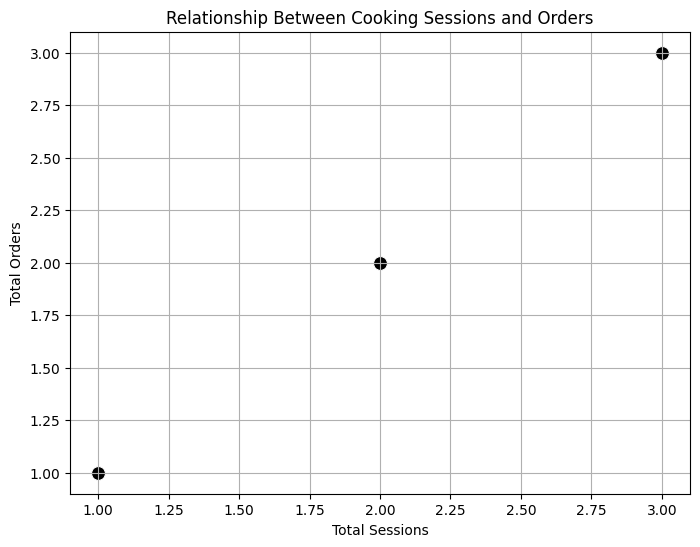

C:\Users\Nishitha\AppData\Local\Temp\ipykernel_2296\4216837246.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_dishes.values, y=popular_dishes.index, palette='flare')


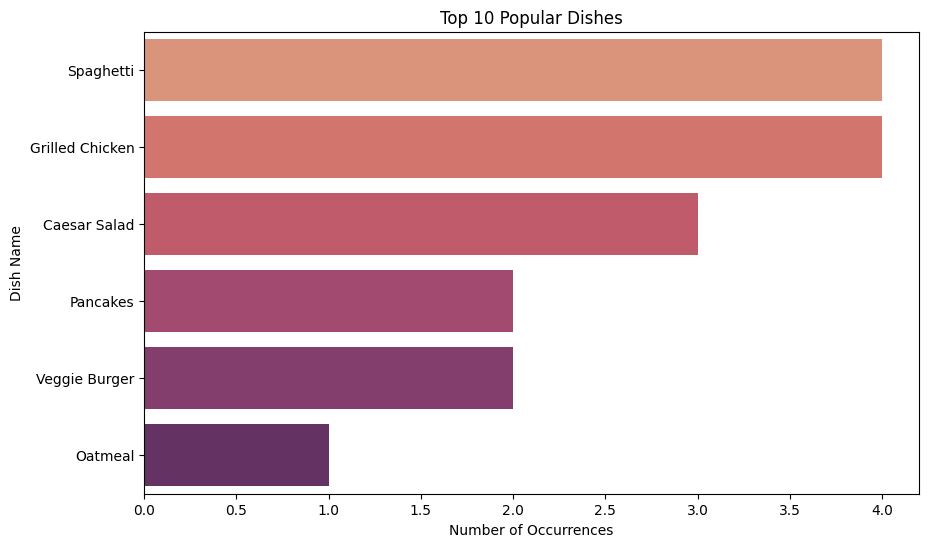

C:\Users\Nishitha\AppData\Local\Temp\ipykernel_2296\4216837246.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_by_age_group = merged_data.groupby('Age Group')['Order ID'].nunique()
C:\Users\Nishitha\AppData\Local\Temp\ipykernel_2296\4216837246.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_by_age_group.index, y=orders_by_age_group.values, palette='coolwarm')


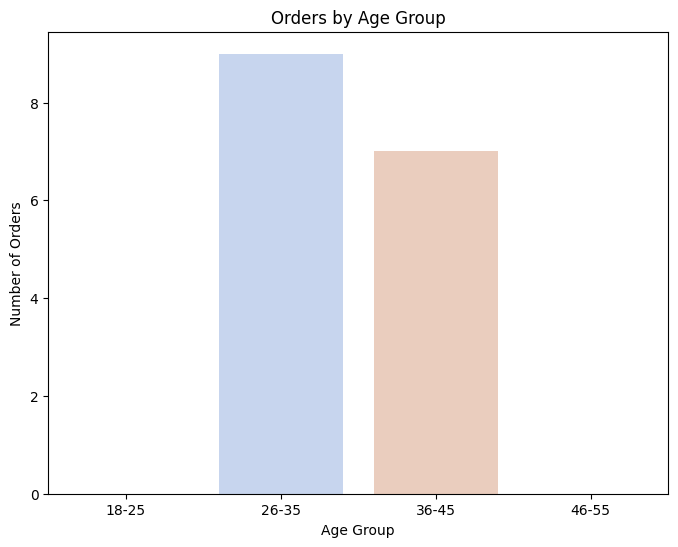

In [56]:
# Relationship between cooking sessions and user orders
session_order_analysis = merged_data.groupby('User ID_x').agg({
    'Session ID': 'nunique',  # Number of unique sessions
    'Order ID': 'nunique',    # Number of unique orders
}).reset_index().rename(columns={'Session ID': 'Total Sessions', 'Order ID': 'Total Orders'})

# Plot: Relationship between cooking sessions and orders
plt.figure(figsize=(8, 6))
sns.scatterplot(data=session_order_analysis, x='Total Sessions', y='Total Orders', s=100, color='black')
plt.title('Relationship Between Cooking Sessions and Orders')
plt.xlabel('Total Sessions')
plt.ylabel('Total Orders')
plt.grid(True)
plt.show()

# Identifying popular dishes
popular_dishes = merged_data['Dish Name_x'].value_counts().head(10)

# Plot: Top 10 Popular Dishes
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_dishes.values, y=popular_dishes.index, palette='flare')
plt.title('Top 10 Popular Dishes')
plt.xlabel('Number of Occurrences')
plt.ylabel('Dish Name')
plt.show()

# Demographic analysis: Orders by age group
age_bins = [18, 25, 35, 45, 55]
age_labels = ['18-25', '26-35', '36-45', '46-55']
merged_data['Age Group'] = pd.cut(merged_data['Age'], bins=age_bins, labels=age_labels, right=False)
orders_by_age_group = merged_data.groupby('Age Group')['Order ID'].nunique()

# Plot: Orders by Age Group
plt.figure(figsize=(8, 6))
sns.barplot(x=orders_by_age_group.index, y=orders_by_age_group.values, palette='coolwarm')
plt.title('Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.show()


The analysis offers the following insights:

Relationship Between Cooking Sessions and Orders

A scatter plot depicts how the number of cooking sessions related to user orders, suggesting user involvement levels.

Top Six Popular Dishes:

A bar chart shows the most commonly cooked foods, indicating user preferences.

Orders By Age Group:

A bar chart shows the distribution of orders by age group, illustrating demographic changes.
